# Multiple Layer LSTM

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# Let's install tensorflow 2.x first :)
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
  # uncomment next line
  #!pip install tensorflow==2.0.0

In [3]:
try: 
    import tensorflow_datasets as tfds
except Exception:
    !sudo pip install -q tensorflow-datasets

In [17]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf

In [5]:
print(tf.__version__)

2.0.0


In [6]:
DATASET_NAME="imdb_reviews/subwords8k"
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 10

In [7]:
# Download the dataset
imdb, info = tfds.load(DATASET_NAME, with_info=True, as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /home/laura/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [8]:
# Split the data. Reference: https://www.tensorflow.org/datasets/splits#s3_slicing_api
train_dataset, test_dataset = imdb['train'], imdb['test']

In [9]:
# Lets get the encoder. Which is a SubwordTextEncoder
# Ref: https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder
tokenizer = info.features['text'].encoder

In [10]:
# Prepare the data for training by adding padding to the training dataset
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [11]:
# Create the model, with 2 LSTM layers 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 141s 359ms/step - loss: 0.5342 - accuracy: 0.7330 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 130s 332ms/step - loss: 0.4187 - accuracy: 0.8149 - val_loss: 0.4664 - val_accuracy: 0.7877
Epoch 3/10
391/391 [==============================] - 132s 338ms/step - loss: 0.3583 - accuracy: 0.8536 - val_loss: 0.4267 - val_accuracy: 0.8377
Epoch 4/10
391/391 [==============================] - 132s 337ms/step - loss: 0.2582 - accuracy: 0.9004 - val_loss: 0.4121 - val_accuracy: 0.8348
Epoch 5/10
391/391 [==============================] - 129s 330ms/step - loss: 0.1883 - accuracy: 0.9320 - val_loss: 0.4581 - val_accuracy: 0.8340
Epoch 6/10
391/391 [==============================] - 131s 335ms/step - loss: 0.1667 - accuracy: 0.9403 - val_loss: 0.5410 - val_accuracy: 0.8114
Epoch 7/10
391/391 [==============================] - 134s 343ms/step - loss: 0.1599 - accuracy: 0.9428 - val_loss: 

In [15]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

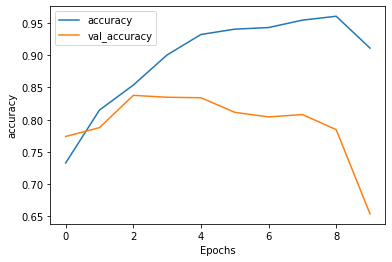

In [18]:
plot_graphs(history, 'accuracy')

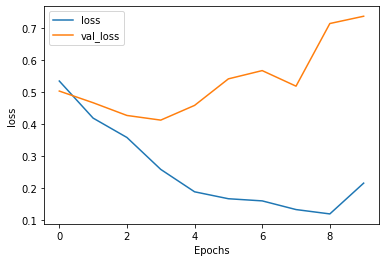

In [19]:
plot_graphs(history, 'loss')

In [21]:
session.close()